## Final Project Submission

* Student name: Greg Osborne
* Student pace: self paced / part time
* Scheduled project review date/time: 6/28/22
* Instructor name: Clause Fried
* Blog post URL: https://medium.com/@gregosborne


## Project Overview

For this project, you will use multiple linear regression modeling to analyze house sales in a northwestern county.

### Business Problem

It is up to you to define a stakeholder and business problem appropriate to this dataset.

If you are struggling to define a stakeholder, we recommend you complete a project for a real estate agency that helps homeowners buy and/or sell homes. A business problem you could focus on for this stakeholder is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### The Data

This project uses the King County House Sales dataset, which can be found in  `kc_house_data.csv` in the data folder in this assignment's GitHub repository. The description of the column names can be found in `column_names.md` in the same folder. As with most real world data sets, the column names are not perfectly described, so you'll have to do some research or use your best judgment if you have questions about what the data means.

It is up to you to decide what data from this dataset to use and how to use it. If you are feeling overwhelmed or behind, we recommend you **ignore** some or all of the following features:

* `date`
* `view`
* `sqft_above`
* `sqft_basement`
* `yr_renovated`
* `zipcode`
* `lat`
* `long`
* `sqft_living15`
* `sqft_lot15`

### Key Points

* **Your goal in regression modeling is to yield findings to support relevant recommendations. Those findings should include a metric describing overall model performance as well as at least two regression model coefficients.** As you explore the data and refine your stakeholder and business problem definitions, make sure you are also thinking about how a linear regression model adds value to your analysis. "The assignment was to use linear regression" is not an acceptable answer! You can also use additional statistical techniques other than linear regression, so long as you clearly explain why you are using each technique.

* **You should demonstrate an iterative approach to modeling.** This means that you must build multiple models. Begin with a basic model, evaluate it, and then provide justification for and proceed to a new model. After you finish refining your models, you should provide 1-3 paragraphs in the notebook discussing your final model.

* **Data visualization and analysis are no longer explicit project requirements, but they are still very important.** In Phase 1, your project stopped earlier in the CRISP-DM process. Now you are going a step further, to modeling. Data visualization and analysis will help you build better models and tell a better story to your stakeholders.

### Statistical Communication

Recall that communication is one of the key data science "soft skills". In Phase 2, we are specifically focused on Statistical Communication. We define Statistical Communication as:

> Communicating **results of statistical analyses** to diverse audiences via writing and live presentation

Note that this is the same as in Phase 1, except we are replacing "basic data analysis" with "statistical analyses".

High-quality Statistical Communication includes rationale, results, limitations, and recommendations:

* **Rationale:** Explaining why you are using statistical analyses rather than basic data analysis
  * For example, why are you using regression coefficients rather than just a graph?
  * What about the problem or data is suitable for this form of analysis?
  * For a data science audience, this includes your reasoning for the changes you applied while iterating between models.
* **Results:** Describing the overall model metrics and feature coefficients
  * You need at least one overall model metric (e.g. r-squared or RMSE) and at least two feature coefficients.
  * For a business audience, make sure you connect any metrics to real-world implications. You do not need to get into the details of how linear regression works.
  * For a data science audience, you don't need to explain what a metric is, but make sure you explain why you chose that particular one.
* **Limitations:** Identifying the limitations and/or uncertainty present in your analysis
  * This could include p-values/alpha values, confidence intervals, assumptions of linear regression, missing data, etc.
  * In general, this should be more in-depth for a data science audience and more surface-level for a business audience.
* **Recommendations:** Interpreting the model results and limitations in the context of the business problem
  * What should stakeholders _do_ with this information?

### Data Preparation Fundamentals

We define this objective as:

> Applying appropriate **preprocessing** and feature engineering steps to tabular data in preparation for statistical modeling

The two most important components of preprocessing for the Phase 2 project are:

* **Handling Missing Values:** Missing values may be present in the features you want to use, either encoded as `NaN` or as some other value such as `"?"`. Before you can build a linear regression model, make sure you identify and address any missing values using techniques such as dropping or replacing data.
* **Handling Non-Numeric Data:** A linear regression model needs all of the features to be numeric, not categorical. For this project, ***be sure to pick at least one non-numeric feature and try including it in a model.*** You can identify that a feature is currently non-numeric if the type is `object` when you run `.info()` on your dataframe. Once you have identified the non-numeric features, address them using techniques such as ordinal or one-hot (dummy) encoding.

There is no single correct way to handle either of these situations! Use your best judgement to decide what to do, and be sure to explain your rationale in the Markdown of your notebook.

Feature engineering is encouraged but not required for this project.

### Linear Modeling

According to [Kaggle's 2020 State of Data Science and Machine Learning Survey](https://www.kaggle.com/kaggle-survey-2020), linear and logistic regression are the most popular machine learning algorithms, used by 83.7% of data scientists. They are small, fast models compared to some of the models you will learn later, but have limitations in the kinds of relationships they are able to learn.

In this project you are required to use linear regression as the primary statistical analysis, although you are free to use additional statistical techniques as appropriate.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data/kc_house_data.csv')

Seattle properties instructed me to not use the following columns listed below in my analysis. I dropped them from the data.

In [2]:
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 
                   'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
                   'sqft_lot15']
data = data.drop(columns_to_drop,axis='columns')
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


I need to see what types of data are stored in each column. For this I'll run the info method.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


I need to see what kinds of values are in each of the three object columns. For this, I'll use value_counts.

In [4]:
data['waterfront'].value_counts()


NO     19075
YES      146
Name: waterfront, dtype: int64

Regarding the Waterfront column, 11% is a lot of useful data. This data came from people's homelistings, and nobody would fail to mention that their home is on a waterfront since that significantly increases its value. That, and the fact that less than 1% of the entire dataset holds a yes in waterfront, we're going to change all those NANs to NOs. 

In [5]:
data.loc[data['waterfront'].isna(),'waterfront'] = 'NO'

Since the waterfront conditional is binary already, I'll turn it into a simple 1 or zero, rather than splitting it to two columns. This will also make the column integers.

In [6]:
data['waterfront'].replace({'NO':0,'YES':1},inplace=True)
data['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [7]:
data['condition'].value_counts()


Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [8]:
data['grade'].value_counts()


7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [9]:
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,Average,8 Good,2004


Now, I'll create dummy variables for each condition in both the condition and grade columns.

In [10]:
#Condition
data = data.join(pd.get_dummies(
        data['condition']
        ,prefix='cond'),
    how='right')

In [11]:
#Grade
data = data.join(pd.get_dummies(
        data['grade']
        ,prefix='grd'),
    how='right')

Dropping the least populated columns from the new dummy variables for the categorical data: "3 Poor" for grade and "Poor" for condition.
Also, I'm setting the columns to an order that makes sense.

In [12]:
#Getting rid of the limit to columns.
pd.set_option("display.max_columns", None)

#Reseting the index and dropping the unwanted columns.
data = data.reset_index()
data = data.reindex(columns=['id', 'price', 'bedrooms', 'bathrooms', 
    'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition',
    'grade', 'yr_built', 'cond_Fair', 'cond_Average', 'cond_Good', 
    'cond_Very Good', 'grd_4 Low', 'grd_5 Fair', 'grd_6 Low Average', 
    'grd_7 Average', 'grd_8 Good', 'grd_9 Better', 'grd_10 Very Good',
    'grd_11 Excellent', 'grd_12 Luxury','grd_13 Mansion'])
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,cond_Fair,cond_Average,cond_Good,cond_Very Good,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,grd_10 Very Good,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,1955,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,1951,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,Average,6 Low Average,1933,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,Very Good,7 Average,1965,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,Average,8 Good,1987,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,Average,8 Good,2009,0,1,0,0,0,0,0,0,1,0,0,0,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,Average,8 Good,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,Average,7 Average,2009,0,1,0,0,0,0,0,1,0,0,0,0,0,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,Average,8 Good,2004,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Something I don't understand here. To avoid the trap of dummy data, I have to drop an entire column of data? Can I just drop the column with the least data (poor and poor), or will that cause problems? I need to ask Claude about this, because I'm confused. Panda's drop first function just drops the first entire columns worth of data, so I guess that's what's necessary.

In [13]:
data.dtypes

id                     int64
price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
waterfront             int64
condition             object
grade                 object
yr_built               int64
cond_Fair              uint8
cond_Average           uint8
cond_Good              uint8
cond_Very Good         uint8
grd_4 Low              uint8
grd_5 Fair             uint8
grd_6 Low Average      uint8
grd_7 Average          uint8
grd_8 Good             uint8
grd_9 Better           uint8
grd_10 Very Good       uint8
grd_11 Excellent       uint8
grd_12 Luxury          uint8
grd_13 Mansion         uint8
dtype: object

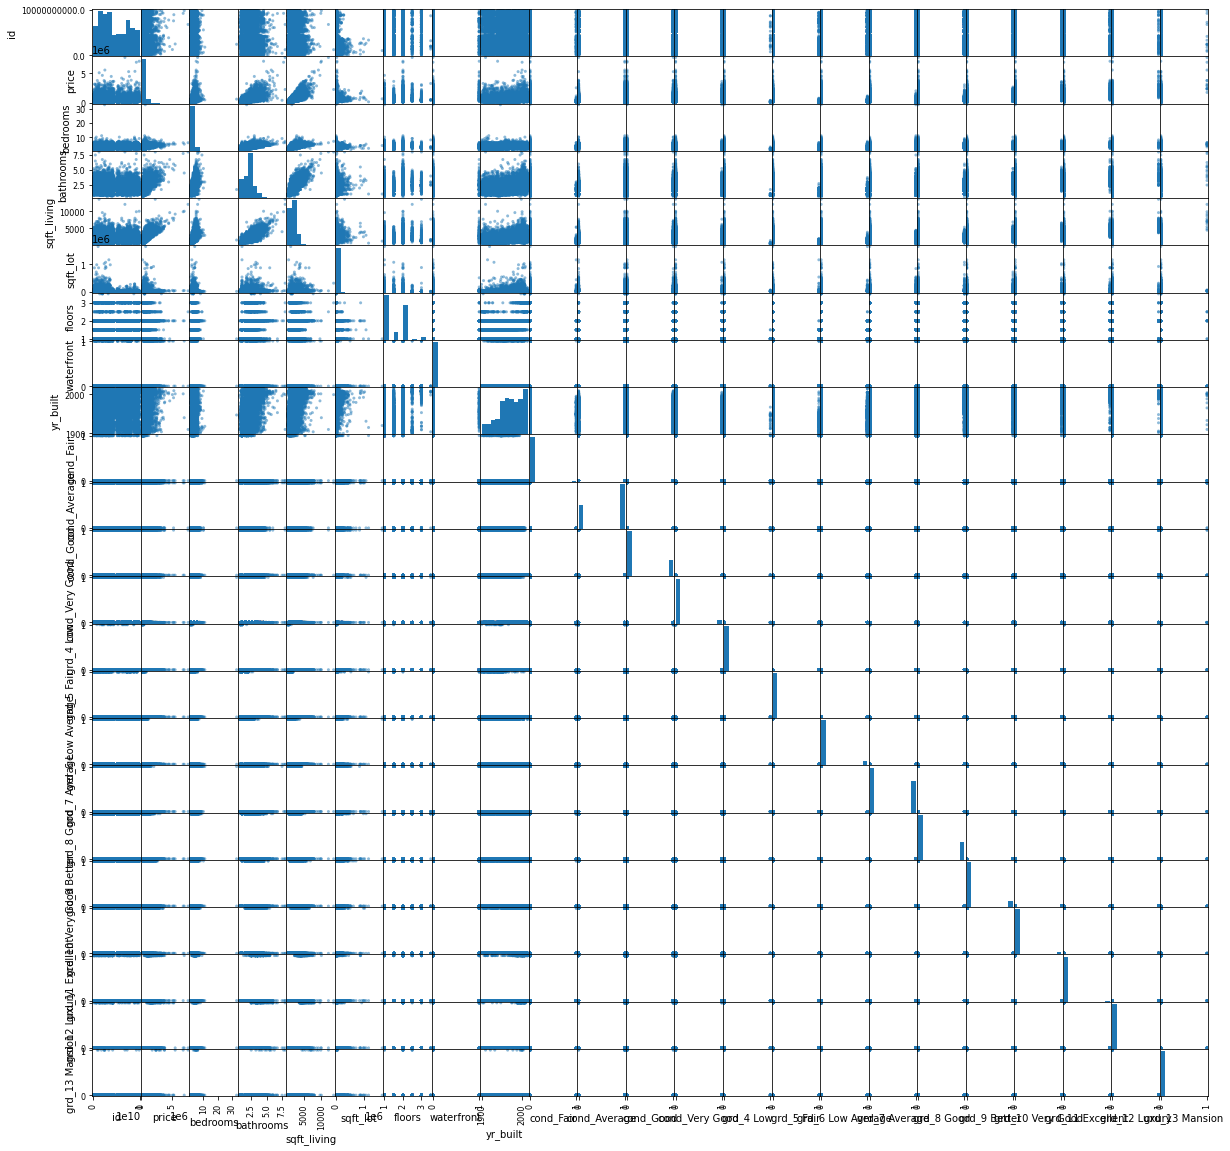

In [14]:
pd.plotting.scatter_matrix(data,figsize  = [20, 20]);
plt.show()

Based on the correlation scatter plots, there seems to be a correlation between price and the following variables: sqft_living, bathrooms, bedrooms, yr_built, & bedrooms. I can't tell anything from these charts regarding the conditional v